In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import string
import os
import numpy as np

# Loading the datasets

In [2]:
# Here, we are loading each file into a DataFrame
altcoin_df = pd.read_csv('csv/altcoin.csv')
appl_df = pd.read_csv('csv/APPL.csv')
bitcoin_df = pd.read_csv('csv/bitcoin.csv')
coindesk_df = pd.read_csv('csv/coindesk.csv')
cryptocurrency_df = pd.read_csv('csv/Cryptocurrency.csv')
gold_df = pd.read_csv('csv/Gold.csv')
goog_df = pd.read_csv('csv/GOOG.csv')
yahoo_df = pd.read_csv('csv/YHOO.csv')

# Combining all datasets together for easy analysis
combined_df = pd.concat([altcoin_df, appl_df, bitcoin_df, coindesk_df, cryptocurrency_df, gold_df, goog_df, yahoo_df], ignore_index=True)

# Displaying the first few rows of the combined datasets
combined_df.head() 

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,#Ethereum price update: \n\n#ETH $1430.93 USD\...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,"@Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...",https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,@Altcoin_Gold Missing $DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,@Altcoin_Gems_ @Lotto_Arb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,@TreatsBot $paw #paw #altcoin #memecoins https...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


# Cleaning the Texts

In [3]:
# Function that will clean the text data
def clean_text(text):
    # start by removing the punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing the numbers/digits
    text = ''.join([i for i in text if not i.isdigit()])
    
    # Removing any short words that has equal or less than 2 letters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text

# Cleaning the new column
combined_df['Text'] = combined_df['Text'].apply(clean_text)

# Removing duplicates values
combined_df.drop_duplicates(inplace=True)

# Displaying the first few rows of the cleaned data
combined_df.head()

,Datetime,Tweet Id,Text,URL,User
0,2023-03-10 23:58:29+00:00,1634342993812414464,Ethereum price update ETH USD Bitcoin BTC Foll...,https://twitter.com/0xEthereumYoda/status/1634...,https://twitter.com/0xEthereumYoda
1,2023-03-10 23:58:19+00:00,1634342954755313664,AltcoinGems LottoArb Wow this Fstastic,https://twitter.com/missufee1410213/status/163...,https://twitter.com/missufee1410213
2,2023-03-10 23:57:48+00:00,1634342825465708545,AltcoinGold Missing DSLA,https://twitter.com/migueldiz0n/status/1634342...,https://twitter.com/migueldiz0n
3,2023-03-10 23:57:48+00:00,1634342821837811712,AltcoinGems LottoArb Wow interesting,https://twitter.com/Hanitzy_/status/1634342821...,https://twitter.com/Hanitzy_
4,2023-03-10 23:57:40+00:00,1634342788518248448,TreatsBot paw paw altcoin memecoins httpstcohi...,https://twitter.com/RifainAP/status/1634342788...,https://twitter.com/RifainAP


# Saving the files in a directory

In [4]:
# Directory for the analysed files
processed_dir = 'processed/'
os.makedirs(processed_dir, exist_ok=True)

# Getting the keyword for each file
keywords = ['Ethereum', 'APPL', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'GOOG', 'YHOO']

# Function that filters and save data based on a keyword
def filter_and_save(keyword):
    # Filtering the rows containing the above keywords
    filtered_df = combined_df[combined_df['Text'].str.contains(keyword, case=False)]
    
    # Selecting only the required columns
    final_df = filtered_df[['Tweet Id', 'Datetime', 'User', 'Text']]
    
    # Renaming columns base on requirement
    final_df.columns = ['tweet id', 'time of tweet', 'user id', 'text']
    
    # Saving the result to CSV file
    file_path = os.path.join(processed_dir, f'{keyword}.csv')
    final_df.to_csv(file_path, index=False)

# Processing and saving all files for each keyword in a directory
for keyword in keywords:
    filter_and_save(keyword)

# Returning the path to the directory containing the processed files
processed_dir

'processed/'

# Some visualization for the updated requirements

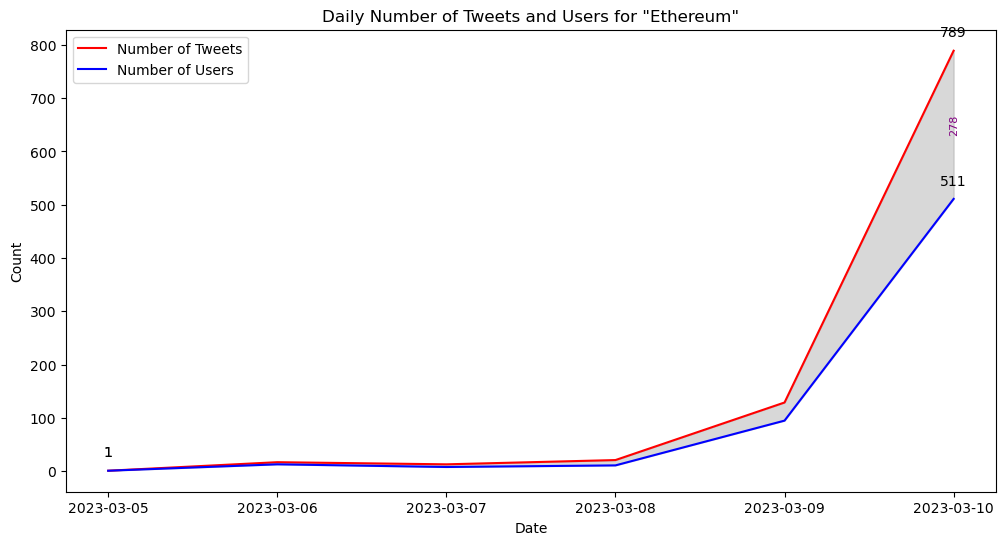

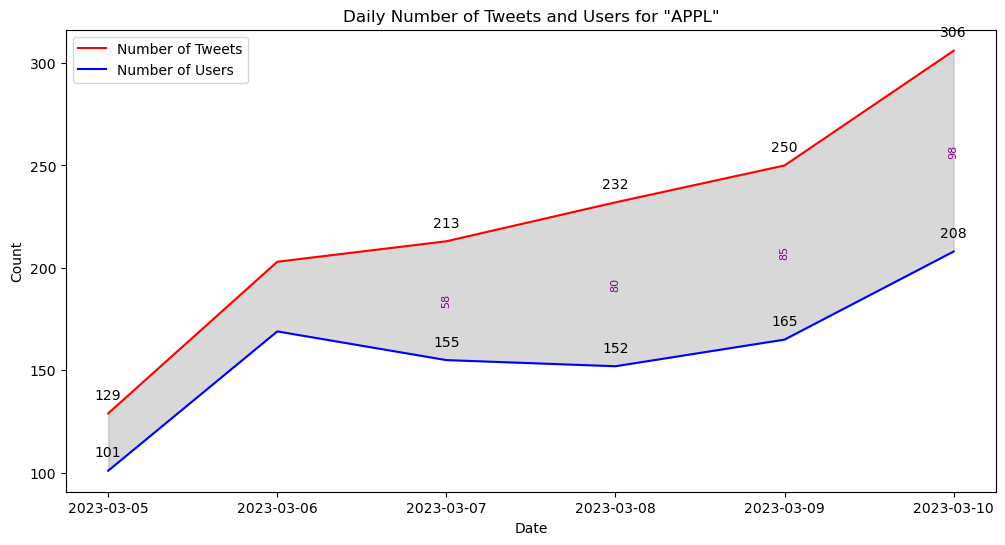

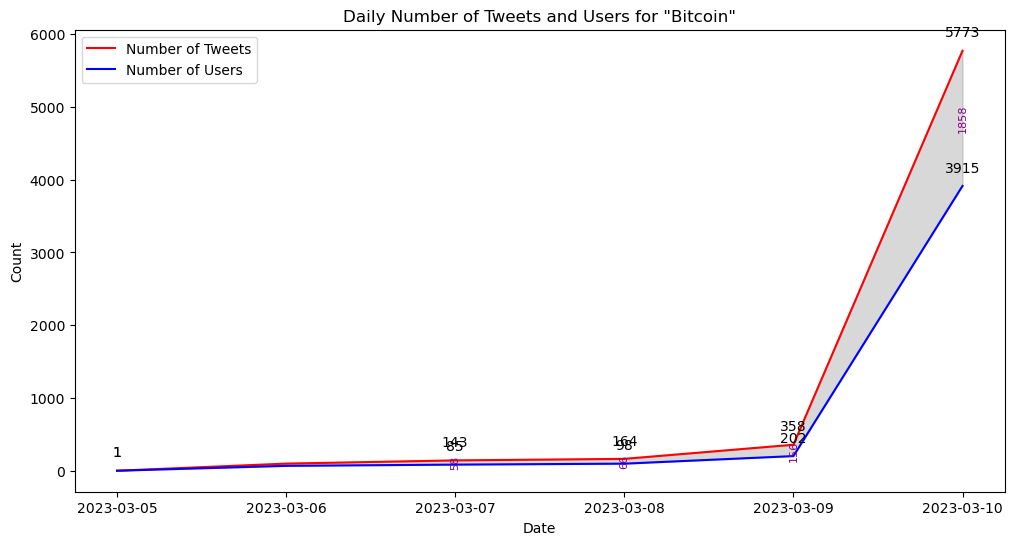

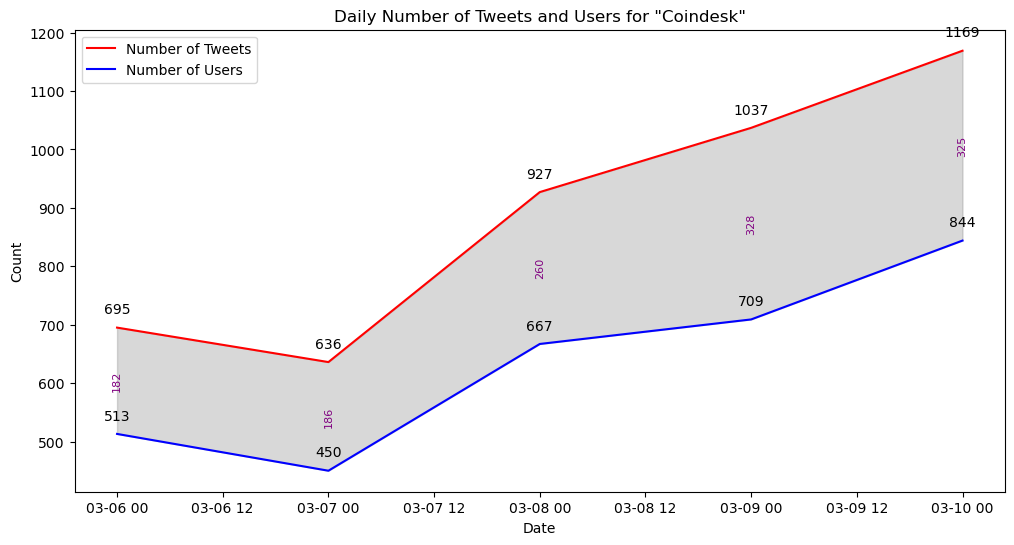

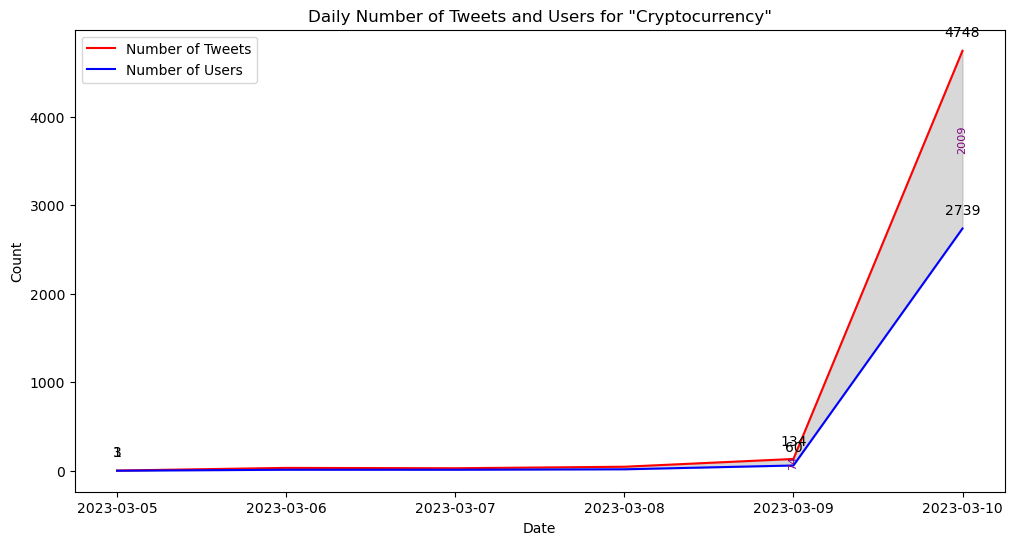

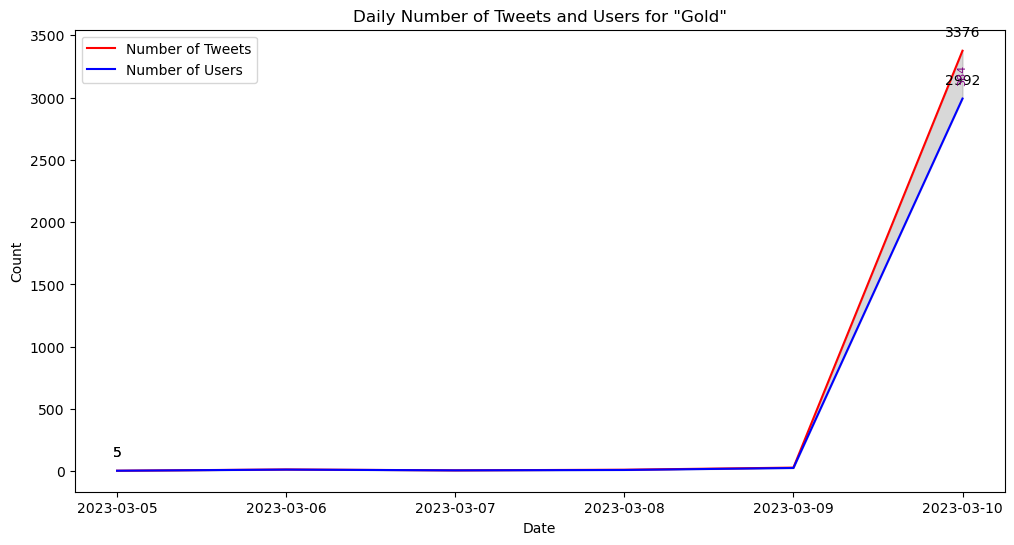

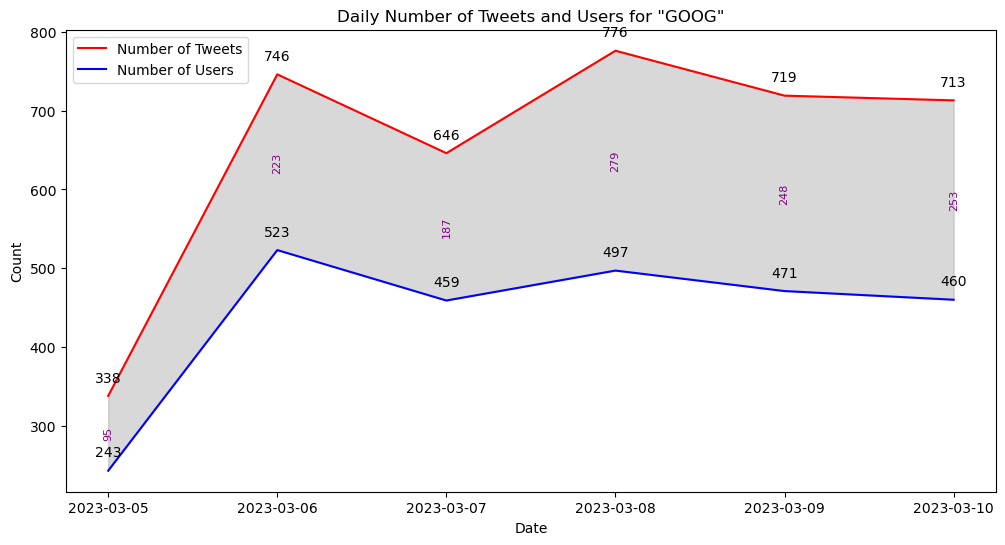

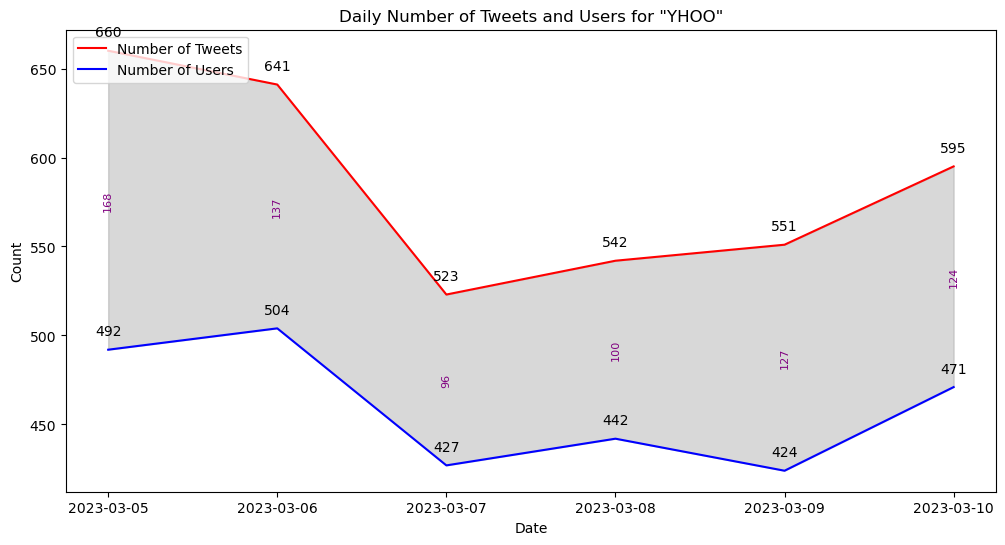

In [21]:
# Function that processes and plots data
def updated_plot_keyword_data(keyword):
    file_path = os.path.join(processed_dir, f'{keyword}.csv')
    df = pd.read_csv(file_path)

    # Converting 'time of tweet' to the appropriate format (datetime)
    df['time of tweet'] = pd.to_datetime(df['time of tweet'])

    # Extracting date from datetime
    df['date'] = df['time of tweet'].dt.date

    # Grouping by date and counting the numbers of tweets and unique users
    daily_tweets = df.groupby('date').size()
    daily_users = df.groupby('date')['user id'].nunique()

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(daily_tweets.index, daily_tweets.values, label='Number of Tweets', color='red')
    ax.plot(daily_users.index, daily_users.values, label='Number of Users', color='blue')

    # Filling the areas between the lines
    ax.fill_between(daily_tweets.index, daily_tweets.values, daily_users.values, 
                    color='gray', alpha=0.3)

    # Annotating points with count for tweets and users
    for i in range(len(daily_tweets)):
        if i == 0 or abs(daily_tweets[i] - daily_users[i]) >= 50:
            ax.annotate(daily_tweets[i], (daily_tweets.index[i], daily_tweets[i]), 
                        textcoords="offset points", xytext=(0,10), ha='center')
            ax.annotate(daily_users[i], (daily_users.index[i], daily_users[i]), 
                        textcoords="offset points", xytext=(0,10), ha='center')

    # Calculating and annotating the difference between the numbers of users and tweets
    for date in daily_tweets.index:
        diff = daily_tweets[date] - daily_users[date]
        
        # Creating the condition for plot only if the difference between the two points if more than 50.
        if abs(diff) >= 50: 
            ax.text(date, (daily_tweets[date] + daily_users[date]) / 2, str(diff), 
                    color='purple', fontsize=8, rotation=90, va='center', ha='center')

    ax.legend(loc='upper left')

    # Assigning the labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.set_title(f'Daily Number of Tweets and Users for "{keyword}"')

    plt.show()

# Plotting the updated data for each keyword
for keyword in keywords:
    updated_plot_keyword_data(keyword)

* These plots above shows the daily number of tweets for each keyword as well as the daily number of users. 